In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#normal_data
normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

# attack_data
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)


In [3]:
processed_normal

,octet_1_eth_dst,octet_2_eth_dst,octet_3_eth_dst,octet_4_eth_dst,octet_5_eth_dst,octet_6_eth_dst,octet_1_eth_src,octet_2_eth_src,octet_3_eth_src,octet_4_eth_src,...,load_14,load_15,load_16,load_17,load_18,load_19,protocol.sport,protocol.dport,TCP,UDP
0,0.999558,-0.798079,0.085577,0.396893,-1.027218,1.371663,-0.752915,-0.288377,1.992587,1.069766,...,0.667342,2.005733,0.618697,0.791433,0.664259,0.313269,1.026406,-0.972130,1,0
1,0.999558,-0.798079,0.085577,0.396893,-1.027218,1.371663,0.553287,0.945509,-0.263293,-1.085399,...,0.667342,2.005733,0.618697,0.791433,0.664259,0.313269,1.026406,-0.972130,1,0
2,-0.581271,-0.090221,1.483294,0.847824,0.285020,0.594669,0.879837,-0.959987,0.294863,0.635392,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,-1.080588,1.112464,1,0
3,-0.581271,-0.090221,1.483294,0.847824,0.285020,0.594669,0.879837,-0.959987,0.294863,0.635392,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,-1.080588,1.112464,1,0
4,-0.581271,-0.090221,1.483294,0.847824,0.285020,0.594669,0.879837,-0.959987,0.294863,0.635392,...,-0.512638,-0.565434,-0.524846,-0.022937,-0.515196,0.313269,-1.080588,1.112464,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140533,0.683392,1.210262,-0.373946,-1.389487,-0.467903,-0.727583,-1.536636,1.351599,-1.588913,0.551858,...,0.372347,-0.351170,0.046925,-0.565851,0.369395,0.029332,-0.877626,1.009160,1,0
140534,-1.340069,1.638269,-1.465314,0.310175,1.833891,-1.981678,0.553287,0.945509,-0.263293,-1.085399,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,0.921991,-0.771326,1,0
140535,0.683392,1.210262,-0.373946,-1.389487,-0.467903,-0.727583,-1.536636,1.351599,-1.588913,0.551858,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,-0.877626,1.009160,1,0
140536,-1.340069,1.638269,-1.465314,0.310175,1.833891,-1.981678,0.553287,0.945509,-0.263293,-1.085399,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,0.921991,-0.771326,1,0


In [4]:
# kmeans = KMeans(n_clusters=8).fit(processed_normal)

In [5]:
# pred = kmeans.predict(processed_attack)

In [6]:
# attack_df['pred'] = list(pred)

In [7]:
# attack_df['pred'].value_counts()

In [8]:
# nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

In [9]:
# nmap_df['pred'].hist(bins=8)

In [10]:
# attack_df['pred'].hist(bins = 8)

In [11]:
# nmap_df['pred'].value_counts()

In [37]:
# Singluar value decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, n_iter=5)

In [38]:
processed_normal_values = processed_normal.values
svd_normal = svd.fit_transform(processed_normal_values)

In [40]:
svd_normal.shape

(140538, 30)

In [41]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(25, input_dim=svd_normal.shape[1], activation='relu'))
model.add(Dense(10, input_dim=svd_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to
model.add(Dense(20, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=10)

Epoch 1/10


2022-03-18 18:16:42.589757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 16s 5ms/step - loss: 0.5704
Epoch 2/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.3516
Epoch 3/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.3153
Epoch 4/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2927
Epoch 5/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2775
Epoch 6/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2682
Epoch 7/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2624
Epoch 8/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2575
Epoch 9/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2537
Epoch 10/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2506


In [43]:
model.save("auto_with_svd3")

INFO:tensorflow:Assets written to: auto_with_svd3/assets


In [44]:
svd_attack = svd.fit_transform(processed_attack.values)

In [45]:
pred = model.predict(svd_attack)

2022-03-18 18:23:17.687610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [46]:
from sklearn import metrics
score_list = []
for index, x in enumerate(pred):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred[index],svd_attack[index])))

attack_df['score'] = score_list

<AxesSubplot:>

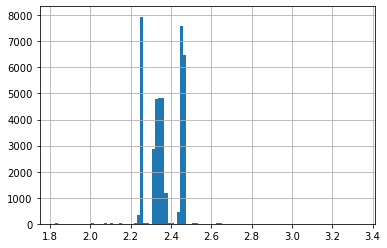

In [47]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
nmap_df["score"].hist(bins=100)

<AxesSubplot:>

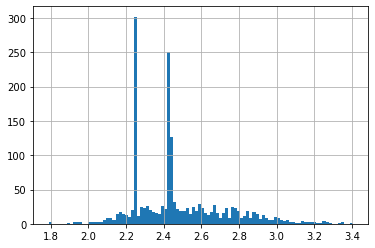

In [48]:
hello = attack_df[attack_df["ip.dst"] == '89.100.107.147']
hello["score"].hist(bins=100)

In [49]:
pred_normal = model.predict(x_normal_test)

In [50]:
hi = np.sqrt(metrics.mean_squared_error(pred_normal,x_normal_test))

In [51]:
hi

0.4980315996360362

In [52]:
hi2 = np.sqrt(metrics.mean_squared_error(model.predict(x_normal_train),x_normal_train))

In [53]:
hi2

0.4984677400272914

In [54]:
synthetic = pd.read_csv('data/synthetic_data.csv')

In [68]:
# process_synthetic = process_df(synthetic)
# svd_synthetic = svd.fit_transform(process_synthetic.values)
# pred_syn = model.predict(svd_synthetic)
# score_syn = []

# for index, x in enumerate(pred_syn):
#     score_syn.append(np.sqrt(metrics.mean_squared_error(pred_syn[index],svd_synthetic[index])))


In [69]:
# plt.hist(score_syn, bins=100, alpha=0.5)

<AxesSubplot:>

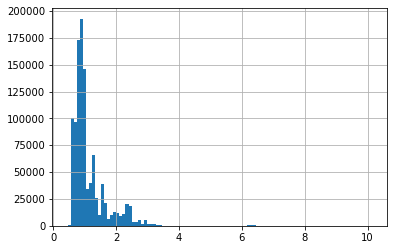

In [70]:
attack_df['score'].hist(bins = 100)

In [66]:
unusually_high_score = attack_df[attack_df['score'] > 2.5]

In [71]:
hello['score'].median()

2.4337509695256063

In [61]:
ip_set = set(attack_df['ip.dst'])

In [63]:
for ip in ip_set:
    print(ip)
    ip_df= attack_df[attack_df["ip.dst"] == ip]
    print("mean",ip_df['score'].median())
    print()

13.69.114.0
mean 1.4110909891441343

20.50.65.82
mean 2.0936643357219147

13.69.106.216
mean 1.9697063133263426

13.69.106.211
mean 1.6973033188753577

198.143.164.243
mean 2.854863075258917

10.244.0.6
mean 3.0932717149585445

172.217.168.234
mean 2.398133191185201

168.63.129.16
mean 2.372527045580781

10.244.0.5
mean 1.6912626929959897

99.84.11.57
mean 2.0271864192539977

13.69.106.217
mean 2.03411796029534

13.69.65.29
mean 1.3679253460742176

45.83.65.187
mean 2.128595991372182

10.244.0.10
mean 2.899582877784345

10.244.0.14
mean 0.9322509394750039

169.254.169.254
mean 2.4611662754012276

10.244.0.11
mean 1.5693327487973763

13.69.106.215
mean 2.0762253776644113

10.244.0.7
mean 2.9109753449672584

52.236.186.218
mean 1.8555130229094845

13.69.106.89
mean 1.7312213995141483

10.244.0.1
mean 1.3629523557887735

10.244.0.9
mean 1.719180930298757

10.244.0.2
mean 1.3451389946149344

142.251.36.42
mean 1.9607260990526905

142.250.179.138
mean 2.112256515155002

198.143.164.251
mean

In [80]:
internal = attack_df[attack_df['ip.dst'] == '45.83.65.187']

<AxesSubplot:>

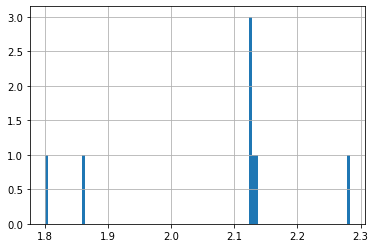

In [81]:
internal['score'].hist(bins=100)